In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

In [22]:
DATA_DIR = 'data/dataset.csv'

In [23]:
def boxplot(data, times=True):
    N = len(data)
    fig, axes = plt.subplots(1, N, figsize=(15, 5), sharey=True)
    for k in range(N):
        if times: axes[k].boxplot(data[k].all_runs)
        else: axes[k].boxplot(data[k])
        axes[k].set_title("K = " + str((k+1)*10))
        axes[k].grid(True)
    plt.tight_layout()
    plt.show()        

In [24]:
def scatter(data):
    plt.scatter(data.source, data.target, s=data.rating*100, c=data.rating, alpha=.5)
    plt.colorbar(ticks=[-10, 0, 10])
    plt.grid(True)
    plt.show()

In [25]:
def histogram(data):
    data_u = np.triu(data, k=1) # Get upper triadiagonal without diagonal
    data_u = data_u.flatten() # Vectorize matrix
    data_u = data_u[data_u>0] # Remove 0
    plt.hist(data_u, bins=20)
    plt.grid(True)
    plt.show()

# k-means clustering <small>[1]</small>

Dado un conjunto de datos $(x_1, x_2, ..., x_n)$, $x_i\in\mathbb{R}^d, \, i=1, ..., n$, $k$-means busca particionar los $n$ datos en $k$ ($\leq n$) conjuntos $S = {S_1, S_2, ..., S_k}$ minimizando el la varianza entre *clusters*. Formalmente, el objetivo es encontrar
\begin{equation}
{\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}={\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}
\end{equation}

donde $\mu_i$ es la media de los puntos en $S_i$. Esto es equivalente a minimizar la desviación al cuadrado entre pares de puntos del mismo *cluster*:

\begin{equation}
{\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\,{\frac {1}{2|S_{i}|}}\,\sum _{\mathbf {x} ,\mathbf {y} \in S_{i}}\left\|\mathbf {x} -\mathbf {y} \right\|^{2}
\end{equation}

## Algoritmo

Dado un conjunto inicial de $k$ medias $m_1^{(1)}, ..., m_k^{(1)}$, el algoritmo funciona alternando los siguientes dos pasos:

1. **Asignación**: Asignar cada dato al *cluster* cuya media tenga la menor distancia Euclidiana al cuadrado, esto es intuitivamente la media "más cercana".

\begin{equation}
S_{i}^{(t)}={\big \{}x_{p}:{\big \|}x_{p}-m_{i}^{(t)}{\big \|}^{2}\leq {\big \|}x_{p}-m_{j}^{(t)}{\big \|}^{2}\ \forall j,1\leq j\leq k{\big \}}
\end{equation}

donde cada $x_{p}$ es asignado exactamente a un $S^{(t)}$, aun si este pudiera ser asignado a dos o más conjuntos.

2. **Actualización**: Calcular la nueva media (centroide) de los datos en los nuevos *clusters*.

\begin{equation}
    m_{i}^{(t+1)}={\frac {1}{\left|S_{i}^{(t)}\right|}}\sum _{x_{j}\in S_{i}^{(t)}}x_{j}
\end{equation}

In [26]:
data = pd.read_csv(DATA_DIR, header=None, names=['source', 'target', 'rating'])

In [27]:
data.describe()

,source,target,rating
count,24186.000000,24186.000000,24186.000000
mean,864.029314,1051.093815,1.463946
std,1592.085638,1871.765504,2.903656
min,1.000000,1.000000,-10.000000
25%,58.000000,66.000000,1.000000
50%,238.000000,279.000000,1.000000
75%,898.000000,1068.000000,2.000000
max,7604.000000,7604.000000,10.000000


In [28]:
data_12 = data[data.target > np.max(data.target) / 2]

In [29]:
data_12.describe()

,source,target,rating
count,1632.000000,1632.000000,1632.000000
mean,1129.602941,7390.294118,-3.141544
std,2136.001796,527.135146,5.879972
min,1.000000,4017.000000,-10.000000
25%,43.000000,7419.000000,-10.000000
50%,191.000000,7550.500000,-1.000000
75%,876.500000,7588.000000,1.000000
max,7604.000000,7604.000000,10.000000


In [30]:
sim = cosine_similarity(data_12)

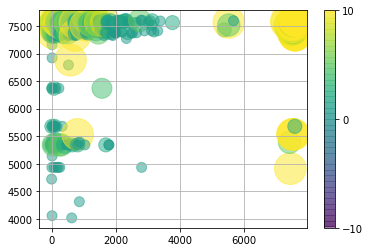

In [31]:
scatter(data_12)

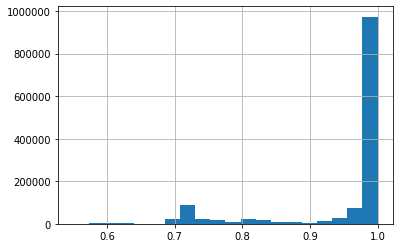

In [32]:
histogram(sim)

Dado que la mayoría de puntos analizados se encuentran cercanos al valor $1$, podemos suponer que se encuentran relativamente cerca o son parecidos por lo tanto se escoge un valor de $convDist=0.1$. Dicho de otra forma, el algoritmo debería converger relativamente rápido ya que los puntos se encuentran más o menos agrupados.

In [33]:
K = list(range(10, 51, 10))
times = list()

In [34]:
for k in K:
    print("k:", k)
    time = %timeit -r 5 -n 1 -o -q !bash run.sh $DATA_DIR $k .1 2>/dev/null
    times.append(time)

Iterations: 34
Iterations: 31
Iterations: 57
Iterations: 49
Iterations: 43
Iterations: 99
Iterations: 105
Iterations: 108
Iterations: 108
Iterations: 89
Iterations: 74
Iterations: 143
Iterations: 122
Iterations: 122
Iterations: 182
Iterations: 160
Iterations: 127
Iterations: 228
Iterations: 168
Iterations: 131
Iterations: 155
Iterations: 155
Iterations: 132
Iterations: 188
Iterations: 158


In [38]:
iterations = np.array([
    [34, 31, 57, 49, 43],
    [99, 105, 108, 108, 89],
    [74, 143, 122, 122, 182],
    [160, 127, 228, 168, 131],
    [155, 155, 132, 188, 158]
])

## Boxplots

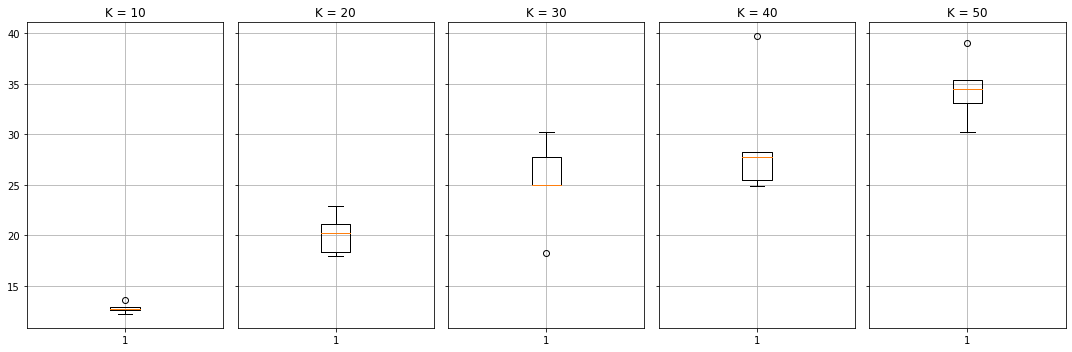

In [36]:
boxplot(times)

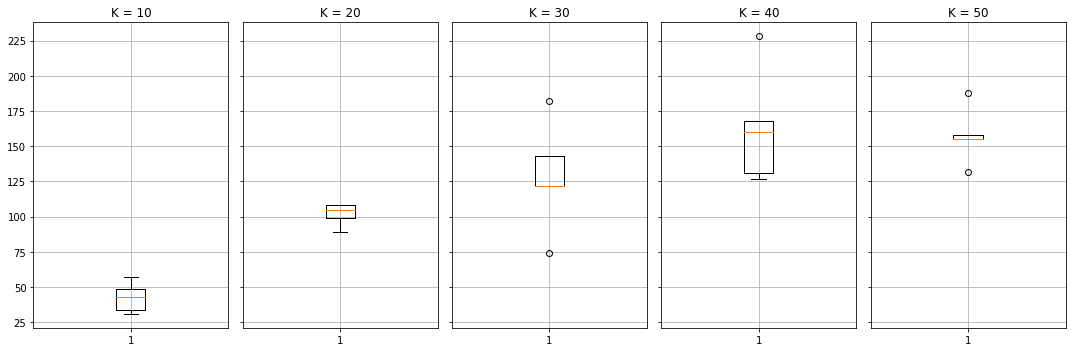

In [39]:
boxplot(iterations, False)

# Referencias

[1] https://en.wikipedia.org/wiki/K-means_clustering